<a href="https://colab.research.google.com/github/krishjalwal/ProjectsIntern/blob/main/Avalanche_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset and libraries

In [206]:
avalanche_data=pd.read_csv('Avalanche DATASET.csv')
avalanche_data.sample(5)

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
51,33,L,10,6,31,1
109,34,M,33,13,35,1
61,18,M,39,12,7,0
13,34,L,64,-21,10,2
156,22,H,48,-14,17,0


In [207]:
avalanche_data.shape

(204, 6)

# Handle Missing Data

In [208]:
avalanche_data.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

- Theres no missing data no we dont need to handle them using traditional mean,median and mode methods

In [209]:
pd.get_dummies(avalanche_data).corr()

,Slope,Snow Density,Air Temperature,Wind,Prediction,Forest Density_H,Forest Density_L,Forest Density_M
Slope,1.000000,0.066079,0.065655,-0.043279,0.487693,0.099001,-0.093853,-0.000341
Snow Density,0.066079,1.000000,-0.046312,0.066345,0.454154,-0.196067,0.248605,-0.064160
Air Temperature,0.065655,-0.046312,1.000000,0.077987,-0.200510,-0.116676,-0.012867,0.128011
Wind,-0.043279,0.066345,0.077987,1.000000,-0.014613,-0.137013,0.110711,0.020290
Prediction,0.487693,0.454154,-0.200510,-0.014613,1.000000,-0.152443,0.213799,-0.071079
Forest Density_H,0.099001,-0.196067,-0.116676,-0.137013,-0.152443,1.000000,-0.509159,-0.456966
Forest Density_L,-0.093853,0.248605,-0.012867,0.110711,0.213799,-0.509159,1.000000,-0.532886
Forest Density_M,-0.000341,-0.064160,0.128011,0.020290,-0.071079,-0.456966,-0.532886,1.000000


<Axes: title={'center': 'Pearson Correlation of Features'}>

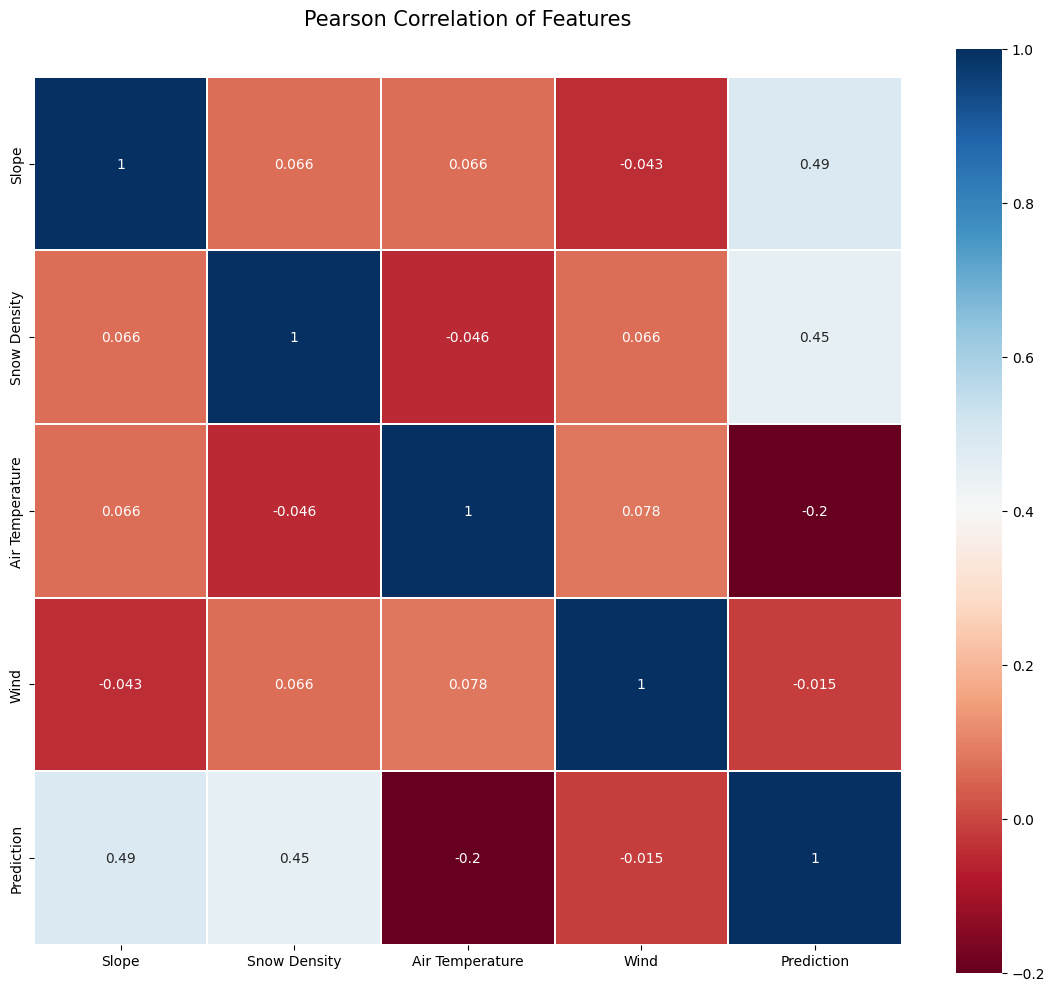

In [210]:
import seaborn as sns
cols = ['Slope','Snow Density','Air Temperature','Wind','Prediction']
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(avalanche_data[cols].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

<Axes: xlabel='Slope', ylabel='Prediction'>

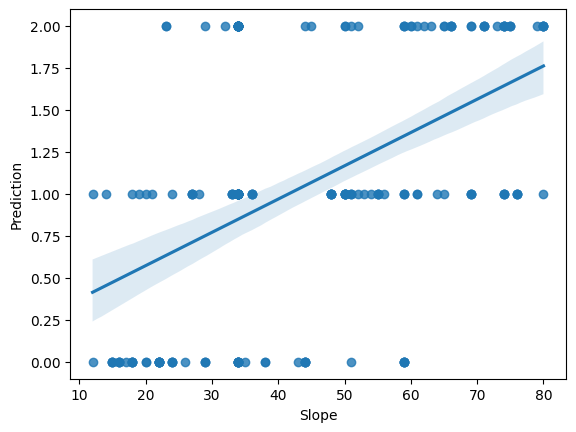

In [211]:
sns.regplot(x=avalanche_data['Slope'],y=avalanche_data['Prediction'])

<Axes: xlabel='Snow Density', ylabel='Prediction'>

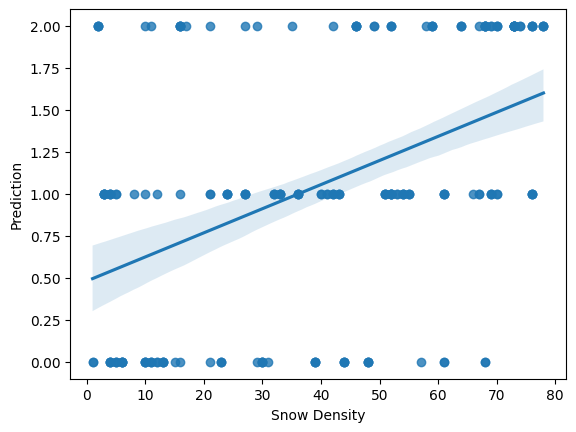

In [212]:
sns.regplot(x=avalanche_data['Snow Density'],y=avalanche_data['Prediction'])

<Axes: xlabel='Air Temperature', ylabel='Prediction'>

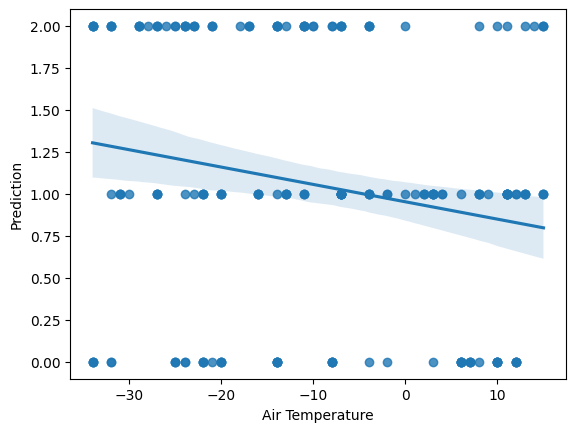

In [213]:
sns.regplot(x=avalanche_data['Air Temperature'],y=avalanche_data['Prediction'])

<Axes: xlabel='Wind', ylabel='Prediction'>

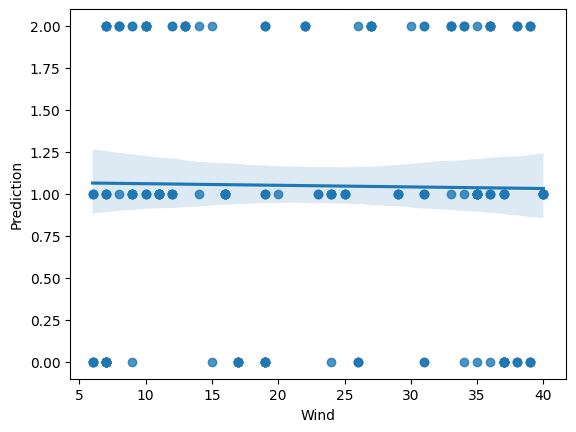

In [214]:
sns.regplot(x=avalanche_data['Wind'],y=avalanche_data['Prediction'])

# insight

- if slope increases then the chance of avalanche is high
- if density of snow increases then also the chance of avalanche is high
- Smaller the temprature or colder the temprature higher chance of avalanche
- Wind speed has significantly less effect on avalache

# check for Outliers

<Axes: >

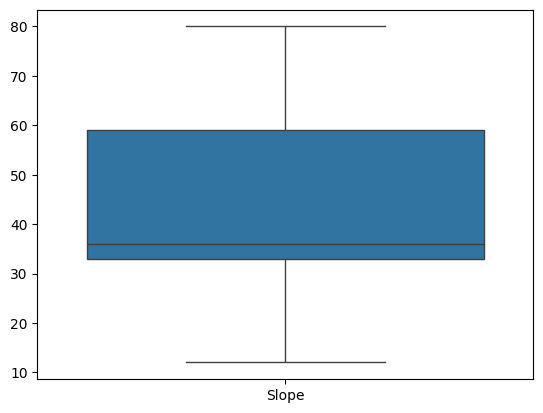

In [215]:
sns.boxplot([avalanche_data['Slope']])

<Axes: ylabel='Snow Density'>

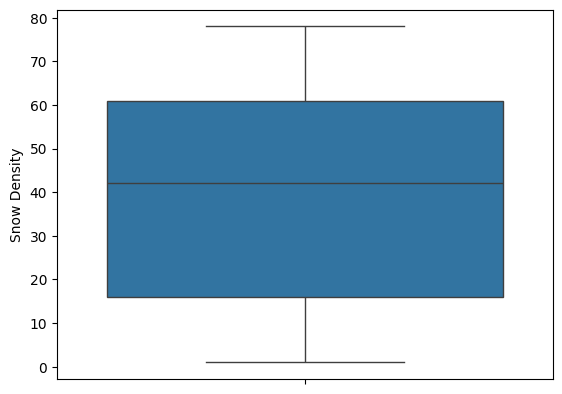

In [216]:
sns.boxplot(avalanche_data['Snow Density'])

<Axes: ylabel='Air Temperature'>

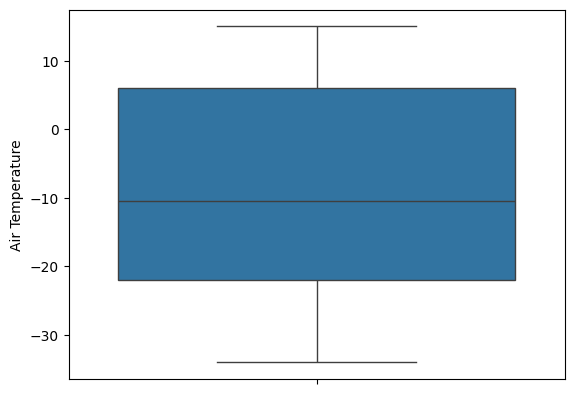

In [217]:
sns.boxplot(avalanche_data['Air Temperature'])

<Axes: ylabel='Wind'>

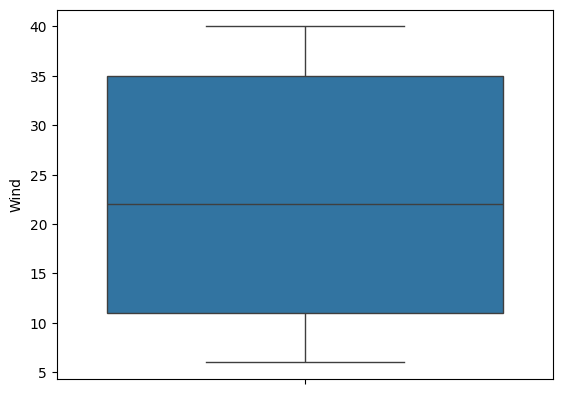

In [218]:
sns.boxplot(avalanche_data['Wind'])

### insight -> No Outliers

# Encoding categorical values and Feature Selection and Scaling

In [219]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [220]:
avalanche_data['Forest Density']=lb.fit_transform(avalanche_data['Forest Density'])

In [221]:
avalanche_data.head(10)

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,0,52,-17,19,2
1,24,1,23,-8,19,0
2,15,0,30,7,19,0
3,27,1,61,-13,25,1
4,34,0,4,-20,7,0
5,34,1,76,-7,40,1
6,34,2,73,-32,27,2
7,34,1,4,3,9,1
8,34,2,44,6,6,0
9,34,1,73,-34,13,2


H=0
l=1
M=2

In [222]:
#lets normalize our features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [223]:
# Splitting the Data into independent and dependent features
x=avalanche_data.iloc[:,:5].values
y=avalanche_data.iloc[:,-1].values
x

array([[ 59,   0,  52, -17,  19],
       [ 24,   1,  23,  -8,  19],
       [ 15,   0,  30,   7,  19],
       ...,
       [ 34,   2,  33,  13,  35],
       [ 34,   1,  51,  -4,  35],
       [ 34,   2,  59, -29,   8]])

In [224]:
x=sc.fit_transform(x)

In [225]:
from joblib import dump

dump(sc, 'avstandard.pkl')


['avstandard.pkl']

In [226]:
x

array([[ 0.78825393, -1.28758635,  0.50956317, -0.51451244, -0.28945657],
       [-1.05401548, -0.02476128, -0.67774511,  0.08602465, -0.28945657],
       [-1.5277419 , -1.28758635, -0.39115346,  1.08691979, -0.28945657],
       ...,
       [-0.52765279,  1.2380638 , -0.26832846,  1.48727784,  1.06799494],
       [-0.52765279, -0.02476128,  0.46862151,  0.35293002,  1.06799494],
       [-0.52765279,  1.2380638 ,  0.79615483, -1.31522855, -1.22270449]])

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [228]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((142, 5), (142,), (62, 5), (62,))

# Model Development and Evaluation

# 1.Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [230]:
lr.fit(x_train,y_train)

LogisticRegression()

In [231]:
yhat=lr.predict(x_test)

In [232]:
yhat

array([1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2])

In [233]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)

0.7096774193548387

# 2. Random Forest Classifier


In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [235]:
parameters={
    'n_estimators':[20,50,100,150,200,250,300,270,350],
    'max_depth':[5,7,8,9,10,4],
    'criterion':['entropy','gini']
}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,param_grid=parameters,cv=5)
rf.fit(x_train,y_train)
print('the best value of learning rate is',rf.best_params_,)

the best value of learning rate is {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}


In [236]:
rf=RandomForestClassifier(n_estimators=150,max_depth=9,criterion='gini')
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=150)

In [237]:
from joblib import dump

dump(rf, 'Avalanche.pkl')


['Avalanche.pkl']

In [238]:
yhat=rf.predict(x_test)

In [239]:
yhat

array([1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2])

In [240]:
accuracy_score(y_test,yhat)

0.8709677419354839

# 3. Decision Tree Classifer

In [241]:
from sklearn.tree import DecisionTreeClassifier
parameters={
    'criterion':['gini','entropy'],
    'max_depth':[5,10,15,20],
    'random_state':[0]
}
dt=DecisionTreeClassifier()
dt=GridSearchCV(dt,param_grid=parameters,cv=5)
dt.fit(x_train,y_train)
print('the best value of learning rate is',dt.best_params_,)

the best value of learning rate is {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}


In [242]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10)

In [243]:
yhat=dt.predict(x_test)

In [244]:
yhat

array([1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2])

In [245]:
accuracy_score(y_test,yhat)

0.8709677419354839

# K Nearest Neighbors Classifier

In [246]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [247]:
parameters={
    'n_neighbors':[5,6,7,10,15,20,30,40,50,45],
    'metric':['minkowski'],
    'p':[1,2]
}
knn=KNeighborsClassifier()
knn=GridSearchCV(knn,param_grid=parameters,cv=5)
knn.fit(x_train,y_train)
print('the best value of learning rate is',knn.best_params_,)

the best value of learning rate is {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}


In [248]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
yhat=knn.predict(x_test)

In [249]:
accuracy_score(y_test,yhat)

0.7580645161290323

# Naive Bayes Classifier

In [250]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [251]:
pipe=Pipeline([('Nb',GaussianNB())])

In [252]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Nb', GaussianNB())])

In [253]:
yhat=pipe.predict(x_test)

In [254]:
accuracy_score(y_test,yhat)

0.6612903225806451

# SVM

In [255]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8387096774193549

In [256]:
 # Random Forest has best accuracy of 87

In [257]:
rf.predict(sc.transform([[59,0,52,-7,19]]))

array([1])